## Task 1

In [2]:
import pandas as pd
import numpy as np
all_data=pd.read_csv('PRSA_data.csv')

In [3]:
#Four dummy variables are introduced to deal with 'cbwd'
all_data['cvornot']=all_data['cbwd']=='cv'
for i in range(len(all_data)):
    if all_data['cvornot'][i]==True:
        all_data['cvornot'][i]=1
    else:
        all_data['cvornot'][i]=0

all_data['NEornot']=all_data['cbwd']=='NE'
for i in range(len(all_data)):
    if all_data['NEornot'][i]==True:
        all_data['NEornot'][i]=1
    else:
        all_data['NEornot'][i]=0

all_data['NWornot']=all_data['cbwd']=='NW'
for i in range(len(all_data)):
    if all_data['NWornot'][i]==True:
        all_data['NWornot'][i]=1
    else:
        all_data['NWornot'][i]=0

all_data['SEornot']=all_data['cbwd']=='SE'
for i in range(len(all_data)):
    if all_data['SEornot'][i]==True:
        all_data['SEornot'][i]=1
    else:
        all_data['SEornot'][i]=0

C:\Users\lzh\AppData\Local\Temp/ipykernel_21000/3183737851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cvornot'][i]=0
d:\Program Files\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\lzh\AppData\Local\Temp/ipykernel_21000/3183737851.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['NEornot'][i

In [4]:
#delete the missing data
all_data=all_data.dropna(how='any')

In [5]:
#用lof算法识别离群值,并除去
from sklearn.neighbors import LocalOutlierFactor
model= LocalOutlierFactor(n_neighbors=60, contamination=0.2)  #由于样本数量较多，我们保留约五分之四的数据
all_data['outlierornot']=model._fit_predict(all_data.iloc[:,[5,6,7,8,10,11,12,13,14,15,16]])
for i in all_data.index:
    if all_data['outlierornot'][i]==-1:
        all_data.drop(index=i,inplace=True)
for i in all_data.index:
    if ((all_data['pm2.5'][i]==0)|(all_data['pm2.5'][i]<0)):
        all_data.drop(index=i,inplace=True)

In [6]:
#splitting data to X and y & do log to y
from scipy import stats
all_data_X=all_data[['DEWP','TEMP','PRES','Iws','Is','Ir','cvornot','NEornot','NWornot','SEornot']]
all_data_y=all_data[['year','month','day','pm2.5']]
all_data_y['pm2.5']=np.log(all_data['pm2.5'])

C:\Users\lzh\AppData\Local\Temp/ipykernel_21000/3396474041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_y['pm2.5']=np.log(all_data['pm2.5'])


In [7]:
#divide all data into training set and test set
import copy
from datetime import date
train_data_task1_X=copy.deepcopy(all_data_X)
test_data_task1_X=copy.deepcopy(all_data_X)
train_data_task1_y=copy.deepcopy(all_data_y)
test_data_task1_y=copy.deepcopy(all_data_y)
for i in all_data.index:
   if date(all_data['year'][i],all_data['month'][i],all_data['day'][i]).weekday()==3:
      train_data_task1_X.drop(index=i,inplace=True)
      train_data_task1_y.drop(index=i,inplace=True)
   else:
      test_data_task1_X.drop(index=i,inplace=True)
      test_data_task1_y.drop(index=i,inplace=True)


In [8]:
#Do the OLS regression required in task 1
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(train_data_task1_X,train_data_task1_y['pm2.5'])
lm.score(train_data_task1_X,train_data_task1_y['pm2.5']),lm.score(test_data_task1_X,test_data_task1_y['pm2.5'])

(0.4710063630059297, 0.47525687275781114)

Text(0, 0.5, 'frequency')

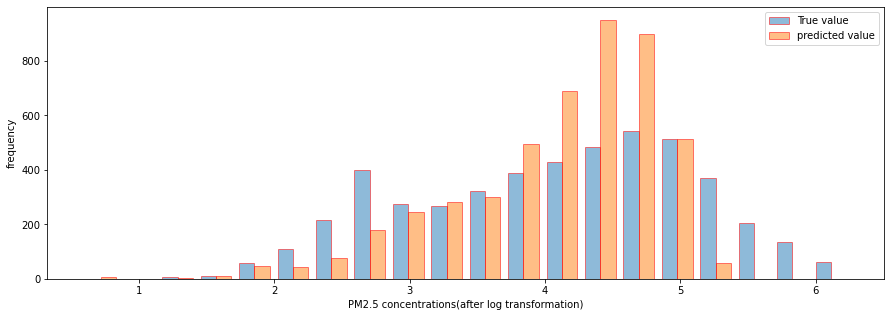

In [9]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task1_y['pm2.5'],lm.predict(test_data_task1_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [10]:
#Ridge regression
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(train_data_task1_X,train_data_task1_y['pm2.5'])
lr.score(train_data_task1_X,train_data_task1_y['pm2.5']),lr.score(test_data_task1_X,test_data_task1_y['pm2.5'])

(0.4710063615102684, 0.47525614009498995)

In [11]:
#Ridge with CV
from sklearn.linear_model import RidgeCV
alphas=np.logspace(-10,10,200)  
lr_cv=RidgeCV(alphas=alphas).fit(train_data_task1_X,train_data_task1_y['pm2.5'])  
lr=Ridge(lr_cv.alpha_)
lr.fit(train_data_task1_X,train_data_task1_y['pm2.5'])
lr.score(train_data_task1_X,train_data_task1_y['pm2.5']),lr.score(test_data_task1_X,test_data_task1_y['pm2.5'])

(0.4710060579607478, 0.47524613613559497)

Text(0, 0.5, 'frequency')

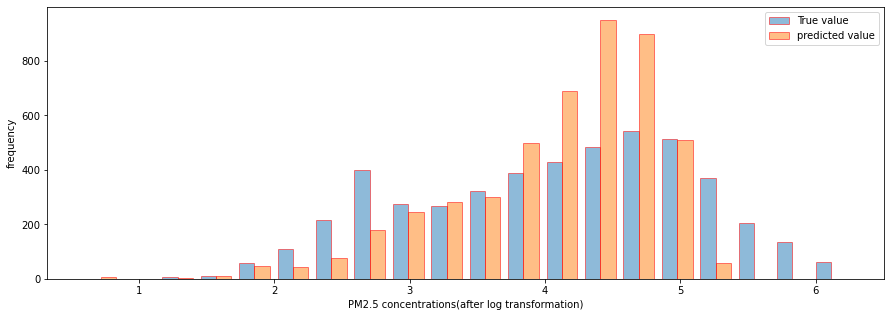

In [12]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task1_y['pm2.5'],lr.predict(test_data_task1_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [13]:
#LASSO regression
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(train_data_task1_X,train_data_task1_y['pm2.5'])
la.score(train_data_task1_X,train_data_task1_y['pm2.5']),la.score(test_data_task1_X,test_data_task1_y['pm2.5'])

(0.3197590689408134, 0.334565029089963)

In [14]:
#LASSO with CV
from sklearn.linear_model import LassoCV
alphas=np.logspace(-10,10,200)  
la_cv=LassoCV(alphas=alphas).fit(train_data_task1_X,train_data_task1_y['pm2.5'])  
la=Lasso(la_cv.alpha_)
la.fit(train_data_task1_X,train_data_task1_y['pm2.5'])
la.score(train_data_task1_X,train_data_task1_y['pm2.5']),la.score(test_data_task1_X,test_data_task1_y['pm2.5'])

(0.47100522194421646, 0.47527106886156123)

Text(0, 0.5, 'frequency')

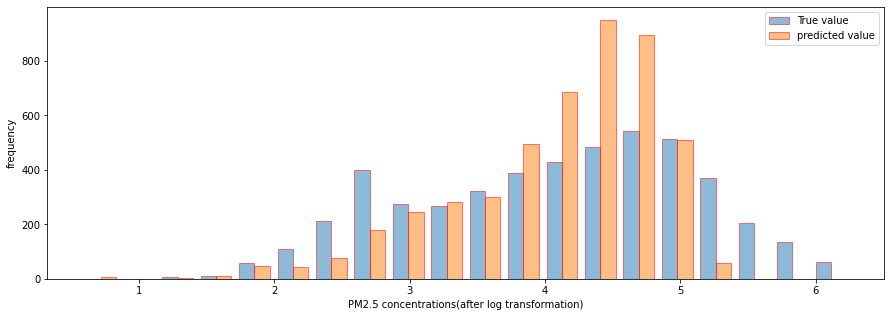

In [15]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task1_y['pm2.5'],la.predict(test_data_task1_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [16]:
from xgboost import XGBRegressor
from sklearn import preprocessing
from hyperopt import hp, fmin, rand, tpe, space_eval
lbl = preprocessing.LabelEncoder()
train_data_task1_X['cvornot'] = lbl.fit_transform(train_data_task1_X['cvornot'].astype(str))
train_data_task1_X['NEornot'] = lbl.fit_transform(train_data_task1_X['NEornot'].astype(str))
train_data_task1_X['NWornot'] = lbl.fit_transform(train_data_task1_X['NWornot'].astype(str))
train_data_task1_X['SEornot'] = lbl.fit_transform(train_data_task1_X['SEornot'].astype(str))
test_data_task1_X['cvornot'] = lbl.fit_transform(test_data_task1_X['cvornot'].astype(str))
test_data_task1_X['NEornot'] = lbl.fit_transform(test_data_task1_X['NEornot'].astype(str))
test_data_task1_X['NWornot'] = lbl.fit_transform(test_data_task1_X['NWornot'].astype(str))
test_data_task1_X['SEornot'] = lbl.fit_transform(test_data_task1_X['SEornot'].astype(str))


space = [hp.uniform('x', 300, 700), hp.uniform('y', 2, 4),hp.uniform('z',0.1,0.2)]
def q (args) :
    x, y,z= args
    xgb=XGBRegressor(n_estimators=int(x),max_depth=int(y),learning_rate=z)
    xgb.fit(train_data_task1_X,train_data_task1_y['pm2.5'])
    return -1*xgb.score(test_data_task1_X,test_data_task1_y['pm2.5'])
best = fmin(q, space, algo=rand.suggest,max_evals=100)

xgb=XGBRegressor(n_estimators=int(best['x']),max_depth=int(best['y']),learning_rate=best['z'])
xgb.fit(train_data_task1_X,train_data_task1_y['pm2.5'])
xgb.score(train_data_task1_X,train_data_task1_y['pm2.5']),xgb.score(test_data_task1_X,test_data_task1_y['pm2.5'])

100%|██████████| 100/100 [01:44<00:00,  1.04s/trial, best loss: -0.6040126408011938]


(0.6349812279158589, 0.6040126408011938)

Text(0, 0.5, 'frequency')

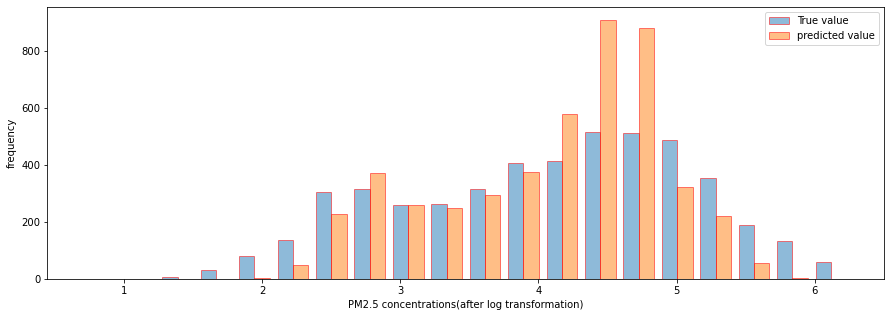

In [17]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task1_y['pm2.5'],xgb.predict(test_data_task1_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [18]:
#梯度boosting算法(含优化函数调参)
from hyperopt import hp, fmin, rand, tpe, space_eval
from sklearn.ensemble import GradientBoostingRegressor
space = [hp.uniform('x', 300, 700), hp.uniform('y', 2, 4),hp.uniform('z',0.1,0.2)]
def q (args) :
    x, y,z= args
    gbr=GradientBoostingRegressor(n_estimators=int(x),max_depth=int(y),learning_rate=z)
    gbr.fit(train_data_task1_X,train_data_task1_y['pm2.5'])
    return -1*gbr.score(test_data_task1_X,test_data_task1_y['pm2.5'])
best = fmin(q, space, algo=rand.suggest,max_evals=100)

gbr=GradientBoostingRegressor(n_estimators=int(best['x']),max_depth=int(best['y']),learning_rate=best['z'])
gbr.fit(train_data_task1_X,train_data_task1_y['pm2.5'])
gbr.score(train_data_task1_X,train_data_task1_y['pm2.5']),gbr.score(test_data_task1_X,test_data_task1_y['pm2.5'])

100%|██████████| 100/100 [12:25<00:00,  7.46s/trial, best loss: -0.6036014228263621]


(0.6323144242001061, 0.6036154800963645)

Text(0, 0.5, 'frequency')

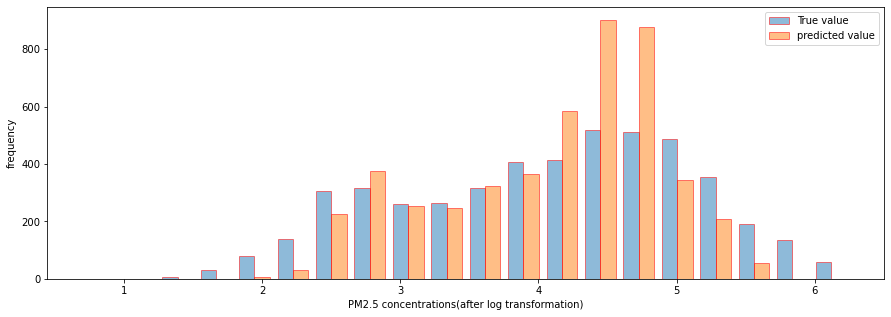

In [19]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task1_y['pm2.5'],gbr.predict(test_data_task1_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')

In [20]:
#catboost
from catboost import CatBoostRegressor
score=pd.DataFrame(columns=['learning_rate','score'])
for i in range(-10,11):
    ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.03982+i*0.0001/20)
    ctr.fit(train_data_task1_X,train_data_task1_y['pm2.5'])
    new=pd.DataFrame({'learning_rate':0.03982+i*0.0001/20,'score':ctr.score(test_data_task1_X,test_data_task1_y['pm2.5'])},index=[1])
    score=score.append(new,ignore_index=True)

0:	learn: 0.9987154	total: 143ms	remaining: 3m 35s
1:	learn: 0.9829418	total: 147ms	remaining: 1m 50s
2:	learn: 0.9675228	total: 151ms	remaining: 1m 15s
3:	learn: 0.9533531	total: 156ms	remaining: 58.4s
4:	learn: 0.9396213	total: 160ms	remaining: 48s
5:	learn: 0.9273677	total: 164ms	remaining: 40.9s
6:	learn: 0.9153655	total: 169ms	remaining: 36s
7:	learn: 0.9043271	total: 173ms	remaining: 32.2s
8:	learn: 0.8934826	total: 177ms	remaining: 29.3s
9:	learn: 0.8838878	total: 180ms	remaining: 26.8s
10:	learn: 0.8743111	total: 185ms	remaining: 25s
11:	learn: 0.8650683	total: 188ms	remaining: 23.4s
12:	learn: 0.8560128	total: 192ms	remaining: 22s
13:	learn: 0.8475642	total: 196ms	remaining: 20.8s
14:	learn: 0.8399077	total: 201ms	remaining: 19.9s
15:	learn: 0.8322945	total: 204ms	remaining: 19s
16:	learn: 0.8264616	total: 208ms	remaining: 18.1s
17:	learn: 0.8203666	total: 212ms	remaining: 17.4s
18:	learn: 0.8143855	total: 217ms	remaining: 16.9s
19:	learn: 0.8084187	total: 220ms	remaining: 16.

In [21]:
score

,learning_rate,score
0,0.039770,0.609357
1,0.039775,0.608113
2,0.039780,0.608471
3,0.039785,0.608297
4,0.039790,0.608564
5,0.039795,0.608467
6,0.039800,0.608530
7,0.039805,0.607953
8,0.039810,0.608324
9,0.039815,0.609629


In [22]:
ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.039815)
ctr.fit(train_data_task1_X,train_data_task1_y['pm2.5'])
ctr.score(train_data_task1_X,train_data_task1_y['pm2.5']),ctr.score(test_data_task1_X,test_data_task1_y['pm2.5'])

0:	learn: 0.9986966	total: 4.44ms	remaining: 6.65s
1:	learn: 0.9829065	total: 8.34ms	remaining: 6.25s
2:	learn: 0.9674722	total: 13ms	remaining: 6.51s
3:	learn: 0.9532894	total: 17.4ms	remaining: 6.51s
4:	learn: 0.9395458	total: 21.8ms	remaining: 6.51s
5:	learn: 0.9272825	total: 25.9ms	remaining: 6.44s
6:	learn: 0.9152717	total: 31.1ms	remaining: 6.63s
7:	learn: 0.9042263	total: 35.4ms	remaining: 6.61s
8:	learn: 0.8933751	total: 39.2ms	remaining: 6.5s
9:	learn: 0.8837754	total: 44.2ms	remaining: 6.59s
10:	learn: 0.8741943	total: 48.4ms	remaining: 6.55s
11:	learn: 0.8649474	total: 52.3ms	remaining: 6.48s
12:	learn: 0.8558882	total: 55.9ms	remaining: 6.39s
13:	learn: 0.8474370	total: 60.2ms	remaining: 6.39s
14:	learn: 0.8397791	total: 64.2ms	remaining: 6.35s
15:	learn: 0.8321640	total: 67.9ms	remaining: 6.3s
16:	learn: 0.8263302	total: 71.9ms	remaining: 6.27s
17:	learn: 0.8202350	total: 77.4ms	remaining: 6.37s
18:	learn: 0.8142544	total: 82.4ms	remaining: 6.42s
19:	learn: 0.8082870	total

(0.6534002358869109, 0.6096294503565602)

Text(0, 0.5, 'frequency')

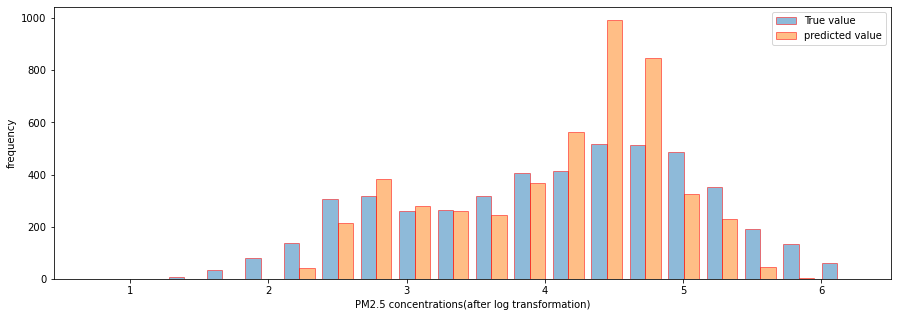

In [23]:
#用直方图可视化训练集的真实y值分布和预测y值分布
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.hist([test_data_task1_y['pm2.5'],ctr.predict(test_data_task1_X)],bins=20,edgecolor="r",histtype="bar",alpha=0.5)
plt.legend(['True value','predicted value'])
plt.xlabel('PM2.5 concentrations(after log transformation)')
plt.ylabel('frequency')